In [78]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import os
from skimage import img_as_ubyte, img_as_float
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

In [79]:
BASEPATH = "data/"
LEGO3_FILENAME = "lego_3.png"
LEGO5_FILENAME = "lego_5.png"
LEGO7_FILENAME = "lego_7.png"
LEGO9_FILENAME = "lego_9.png"
PUZZLE_PIECES_FILENAME = "puzzle_pieces.png"

LEGO3_PATH = os.path.join(BASEPATH, LEGO3_FILENAME)
LEGO5_PATH = os.path.join(BASEPATH, LEGO5_FILENAME)
LEGO7_PATH = os.path.join(BASEPATH, LEGO7_FILENAME)
LEGO9_PATH = os.path.join(BASEPATH, LEGO9_FILENAME)
PUZZLE_PIECES_PATH = os.path.join(BASEPATH, PUZZLE_PIECES_FILENAME)

lego3_img = io.imread(LEGO3_PATH)
lego5_img = io.imread(LEGO5_PATH)
lego7_img = io.imread(LEGO7_PATH)
lego9_img = io.imread(LEGO9_PATH)
puzzle_pieces_img = io.imread(PUZZLE_PIECES_PATH)


In [80]:
# UTILITY FUNCTIONS

# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()
    
    
def threshold_image(img_in, thres: int | float | list[float] | list[int], inverted : bool = False):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    
    if isinstance(thres, list):
        raise NotImplementedError("Not implemented for list")
    elif isinstance(thres, int) or isinstance(thres, float):
        img_out = np.zeros(img_in.shape)
        
        if inverted:
            img_out[img_in < thres] = 1
        else:
            img_out[img_in > thres] = 1
    
    return img_out

def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline
    

In [86]:
def morph_analysis(img, inverted = False):
    img_grey = rgb2gray(img)
    thresh = threshold_otsu(img_grey)
    bin_img = threshold_image(img_grey, thresh, inverted = inverted)
    
    plot_comparison(img, img_grey, "Thresholded image")
    
    footprint = disk(20)
    eroded = erosion(bin_img, footprint)
    plot_comparison(bin_img, eroded, 'erosion')
    
    footprint = disk(5)
    dilated = dilation(bin_img, footprint)
    plot_comparison(bin_img, dilated, 'dilation')
    
    footprint = disk(20)
    opened = opening(bin_img, footprint)
    plot_comparison(bin_img, opened, 'opening')
    
    footprint = disk(10)
    closed = closing(bin_img, footprint)
    plot_comparison(bin_img, closed, 'closing')
    
    img_outline = compute_outline(bin_img)
    plot_comparison(img, img_outline, 'outline')
    
    smooth_outline(img)
    
def smooth_outline(img):
    img_grey = rgb2gray(img)
    thresh = threshold_otsu(img_grey)
    bin_img = threshold_image(img_grey, thresh)
    
    im_tmp = opening(bin_img, disk(1))
    plot_comparison(bin_img, im_tmp, 'opening')
    im_tmp = closing(im_tmp, disk(15))
    plot_comparison(bin_img, im_tmp, 'closing')
    im_tmp = compute_outline(im_tmp)
    plot_comparison(bin_img, im_tmp, 'outline')

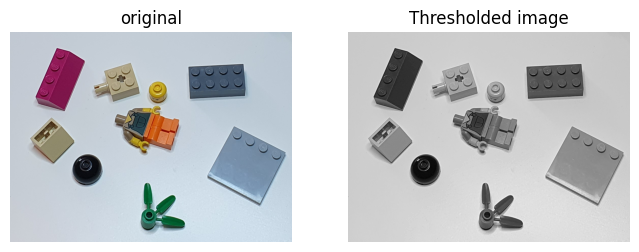

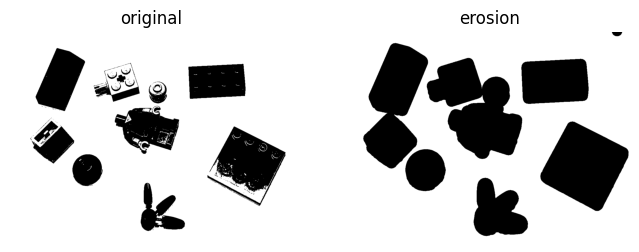

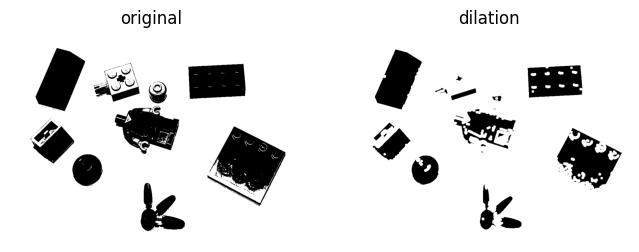

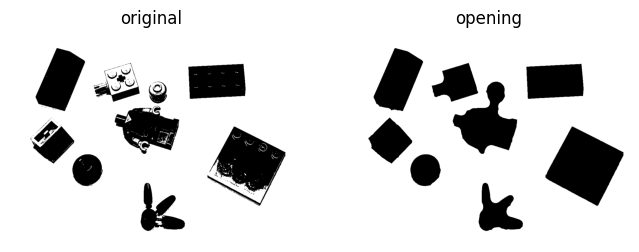

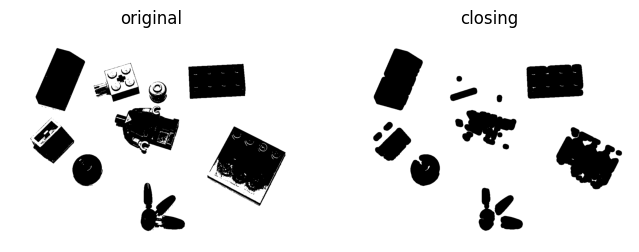

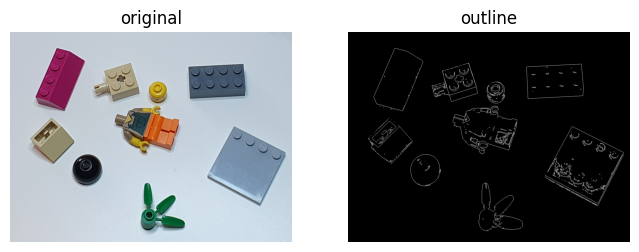

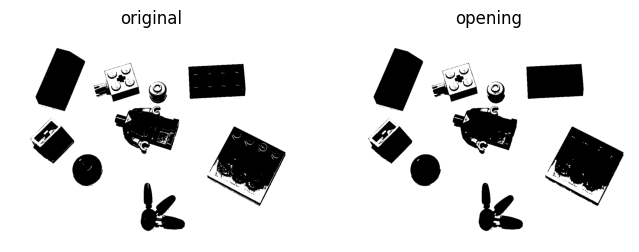

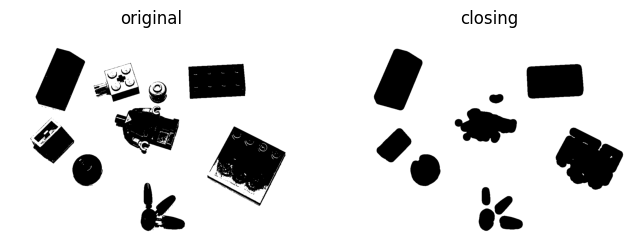

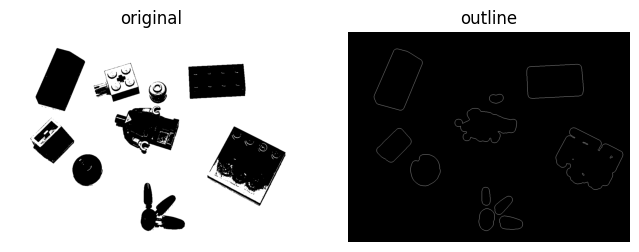

In [82]:
morph_analysis(lego3_img, inverted=True)

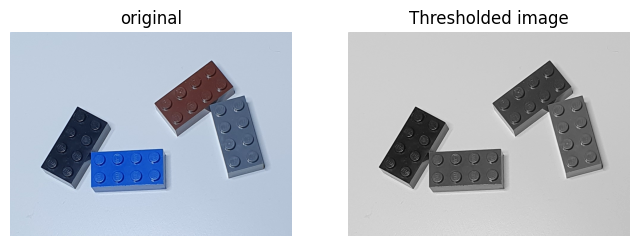

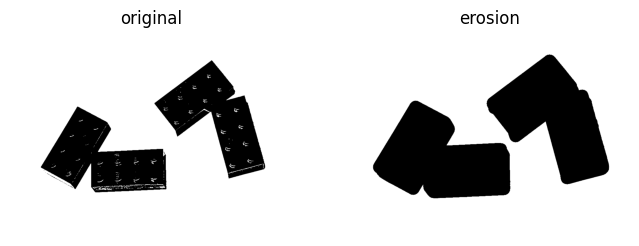

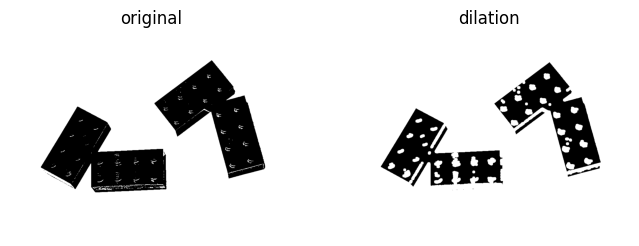

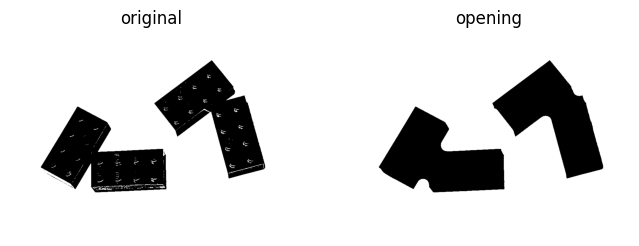

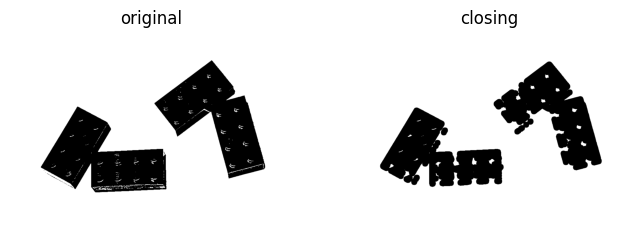

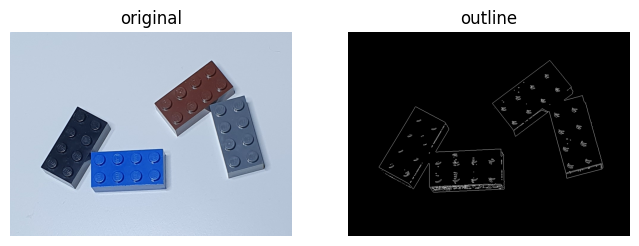

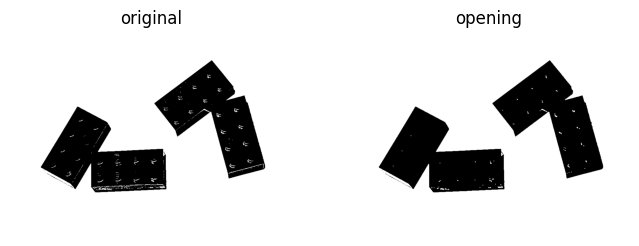

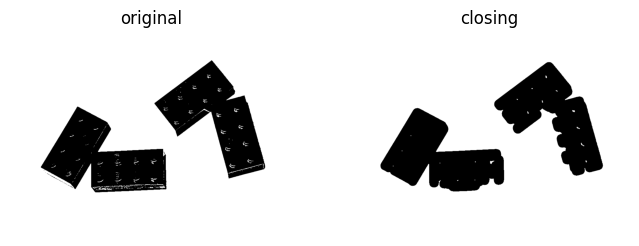

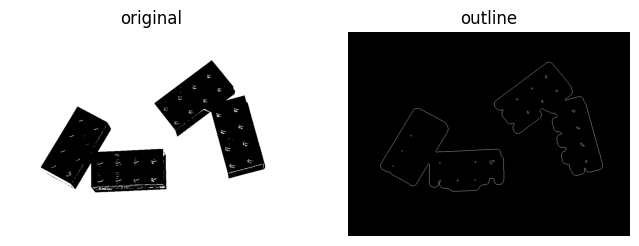

In [83]:
morph_analysis(lego9_img, inverted = True)

## EX 12, 13

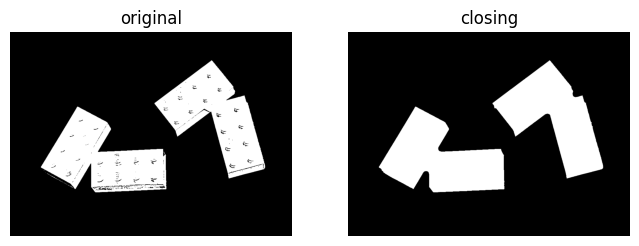

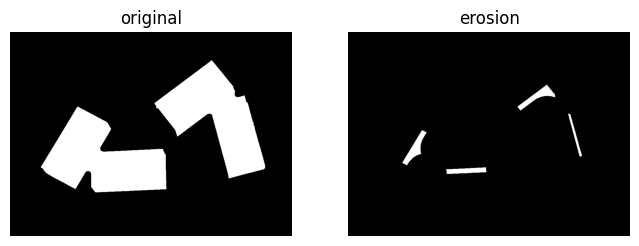

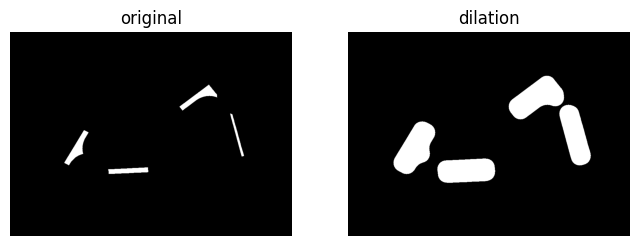

In [93]:
lego9_img_grey = rgb2gray(lego9_img)
thresh = threshold_otsu(lego9_img_grey)
bin_img = threshold_image(lego9_img_grey, thresh, inverted = True)

closed = closing(bin_img, disk(10))
eroded = erosion(closed, disk(60))
dilated = dilation(eroded, disk(30))

plot_comparison(bin_img, closed, 'closing')
plot_comparison(closed, eroded, 'erosion')
plot_comparison(eroded, dilated, 'dilation')